# MSiA 432 - Deep Learning - Final Project
## Group: Alejandra Lelo de Larrea Ibarra, Bannasorn Paspanthong, Ruben Nakano, Samuel Swain
# Style Transfering: Manga
Reference: https://anderfernandez.com/en/blog/how-to-code-neural-style-transfer-in-python/

In [1]:
# Import libraries 
from datetime import datetime
import tensorflow as tf
import numpy as np
from PIL import Image as im 

import keras
from keras import Model
from keras.utils import get_file, plot_model
from keras.optimizers import SGD
from tensorflow.keras.applications import vgg19, vgg16

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

from pathlib import Path
import style_transfering as st

In [2]:
# Try to activate GPUs 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print (f'Found GPU at {device_name}')

Found GPU at /device:GPU:0Metal device set to: Apple M1 Pro



In [3]:
# --- Common Parameters for all experiments ---

# Select base and style image
base_path = Path("../02_Data/face_age/010/755.png")
style_path = Path("../02_Data/manga.png")

# Define layers to extract for the style and content 
style_layers = ["block1_conv1", "block2_conv1", "block3_conv1", "block4_conv1", "block5_conv1",]
content_layers = ["block5_conv2"]

# Select pre-trained model
mod_name = "vgg19"
model = vgg19.VGG19(weights="imagenet", include_top=False)

# Dictionary of layers in the model: map layer names to outputs
outputs_dict= dict([(layer.name, layer.output) for layer in model.layers])

# New model: same model inputs, outputs as specified in outputs_dict
feature_extractor = Model(inputs = model.inputs, outputs = outputs_dict)

# Set optimization parameters
learning_rate = 100.0
decay_steps = 100
decay_rate = 0.96
n_iter = 5000

2023-05-13 22:04:30.133305: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Iteration 100: loss=4377.59
Iteration 200: loss=2236.04
Iteration 300: loss=1726.58
Iteration 400: loss=1440.37
Iteration 500: loss=1251.22
Iteration 600: loss=1117.73
Iteration 700: loss=1018.16
Iteration 800: loss=939.92
Iteration 900: loss=877.06
Iteration 1000: loss=825.15
Iteration 1100: loss=781.27
Iteration 1200: loss=743.50
Iteration 1300: loss=710.91
Iteration 1400: loss=682.39
Iteration 1500: loss=657.72
Iteration 1600: loss=636.07
Iteration 1700: loss=616.86
Iteration 1800: loss=599.67
Iteration 1900: loss=584.17
Iteration 2000: loss=570.17
Iteration 2100: loss=557.43
Iteration 2200: loss=545.85
Iteration 2300: loss=535.29
Iteration 2400: loss=525.53
Iteration 2500: loss=516.56
Iteration 2600: loss=508.29
Iteration 2700: loss=500.63
Iteration 2800: loss=493.51
Iteration 2900: loss=486.88
Iteration 3000: loss=480.71
Iteration 3100: loss=474.96
Iteration 3200: loss=469.60
Iteration 3300: loss=464.59
Iteration 3400: loss=459.91
Iteration 3500: loss=455.53
Iteration 3600: loss=4

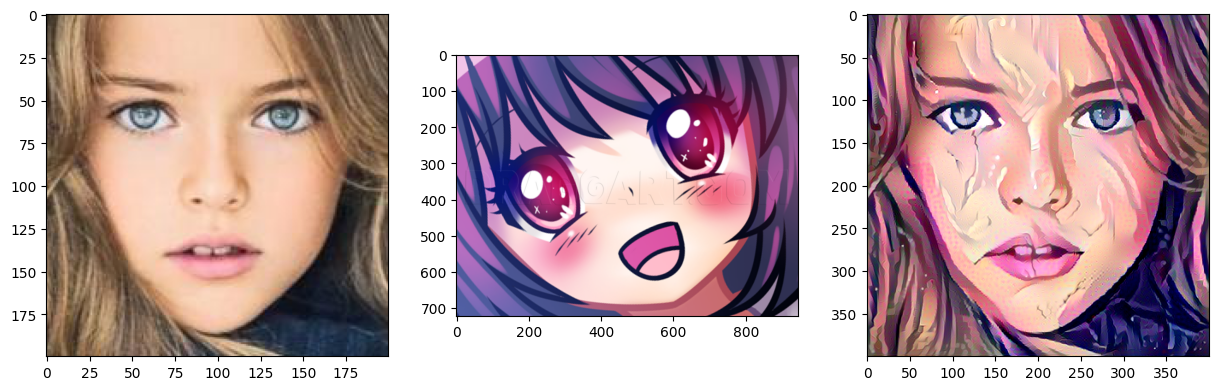

In [4]:
# --- Experiment 1: ----
final_img_path= Path("Results/Manga/Manga_E1.png")
style_weight = 1e-6
content_weight = 2.5e-8

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()


Iteration 100: loss=1571.50
Iteration 200: loss=1074.67
Iteration 300: loss=844.86
Iteration 400: loss=715.23
Iteration 500: loss=633.11
Iteration 600: loss=576.58
Iteration 700: loss=534.97
Iteration 800: loss=502.81
Iteration 900: loss=477.13
Iteration 1000: loss=456.16
Iteration 1100: loss=438.81
Iteration 1200: loss=424.07
Iteration 1300: loss=411.28
Iteration 1400: loss=400.19
Iteration 1500: loss=390.45
Iteration 1600: loss=381.83
Iteration 1700: loss=374.15
Iteration 1800: loss=367.26
Iteration 1900: loss=361.05
Iteration 2000: loss=355.43
Iteration 2100: loss=350.30
Iteration 2200: loss=345.62
Iteration 2300: loss=341.33
Iteration 2400: loss=337.38
Iteration 2500: loss=333.73
Iteration 2600: loss=330.34
Iteration 2700: loss=327.21
Iteration 2800: loss=324.30
Iteration 2900: loss=321.59
Iteration 3000: loss=319.06
Iteration 3100: loss=316.69
Iteration 3200: loss=314.47
Iteration 3300: loss=312.38
Iteration 3400: loss=310.42
Iteration 3500: loss=308.58
Iteration 3600: loss=306.85

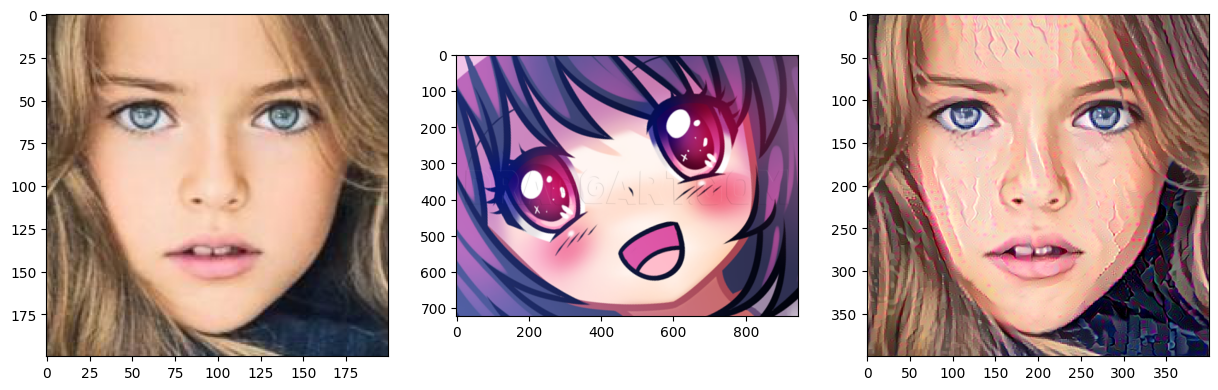

In [5]:
# --- Experiment 2: ----
final_img_path= Path("Results/Manga/Manga_E2.png")
style_weight = 2.5e-8
content_weight = 1e-6

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=4310.79
Iteration 200: loss=2810.42
Iteration 300: loss=2278.72
Iteration 400: loss=1976.56
Iteration 500: loss=1776.65
Iteration 600: loss=1632.78
Iteration 700: loss=1523.19
Iteration 800: loss=1437.07
Iteration 900: loss=1367.58
Iteration 1000: loss=1309.90
Iteration 1100: loss=1260.97
Iteration 1200: loss=1218.60
Iteration 1300: loss=1181.54
Iteration 1400: loss=1149.36
Iteration 1500: loss=1120.86
Iteration 1600: loss=1095.25
Iteration 1700: loss=1072.44
Iteration 1800: loss=1052.06
Iteration 1900: loss=1033.57
Iteration 2000: loss=1016.68
Iteration 2100: loss=1001.34
Iteration 2200: loss=987.27
Iteration 2300: loss=974.28
Iteration 2400: loss=962.32
Iteration 2500: loss=951.37
Iteration 2600: loss=941.33
Iteration 2700: loss=932.03
Iteration 2800: loss=923.41
Iteration 2900: loss=915.40
Iteration 3000: loss=907.96
Iteration 3100: loss=901.00
Iteration 3200: loss=894.49
Iteration 3300: loss=888.40
Iteration 3400: loss=882.69
Iteration 3500: loss=877.33
Iteratio

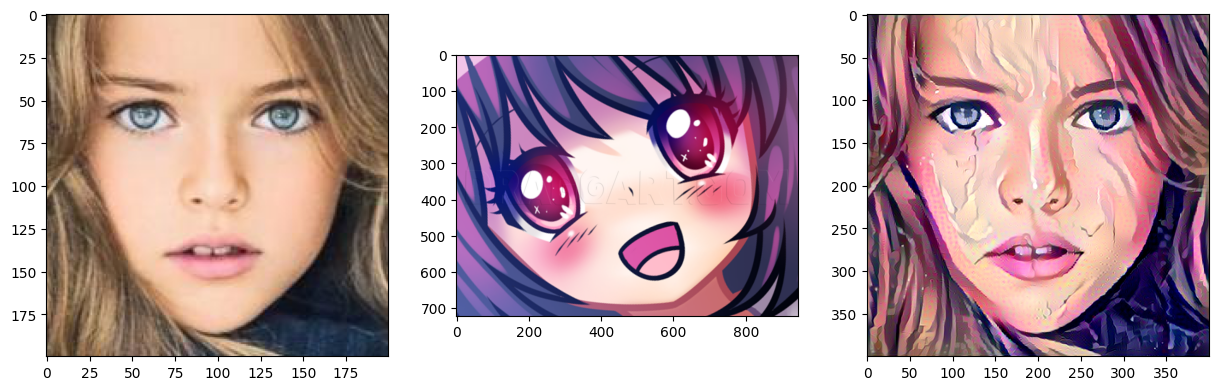

In [6]:
# --- Experiment 3: ----
final_img_path= Path("Results/Manga/Manga.png")
style_weight = 1e-6
content_weight = 1e-6

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=1172.03
Iteration 200: loss=739.87
Iteration 300: loss=557.03
Iteration 400: loss=458.50
Iteration 500: loss=397.61
Iteration 600: loss=355.82
Iteration 700: loss=325.07
Iteration 800: loss=301.33
Iteration 900: loss=282.43
Iteration 1000: loss=266.93
Iteration 1100: loss=253.94
Iteration 1200: loss=242.91
Iteration 1300: loss=233.38
Iteration 1400: loss=225.10
Iteration 1500: loss=217.82
Iteration 1600: loss=211.40
Iteration 1700: loss=205.70
Iteration 1800: loss=200.58
Iteration 1900: loss=195.98
Iteration 2000: loss=191.83
Iteration 2100: loss=188.06
Iteration 2200: loss=184.61
Iteration 2300: loss=181.45
Iteration 2400: loss=178.55
Iteration 2500: loss=175.88
Iteration 2600: loss=173.41
Iteration 2700: loss=171.13
Iteration 2800: loss=169.02
Iteration 2900: loss=167.05
Iteration 3000: loss=165.22
Iteration 3100: loss=163.51
Iteration 3200: loss=161.91
Iteration 3300: loss=160.41
Iteration 3400: loss=159.01
Iteration 3500: loss=157.70
Iteration 3600: loss=156.46


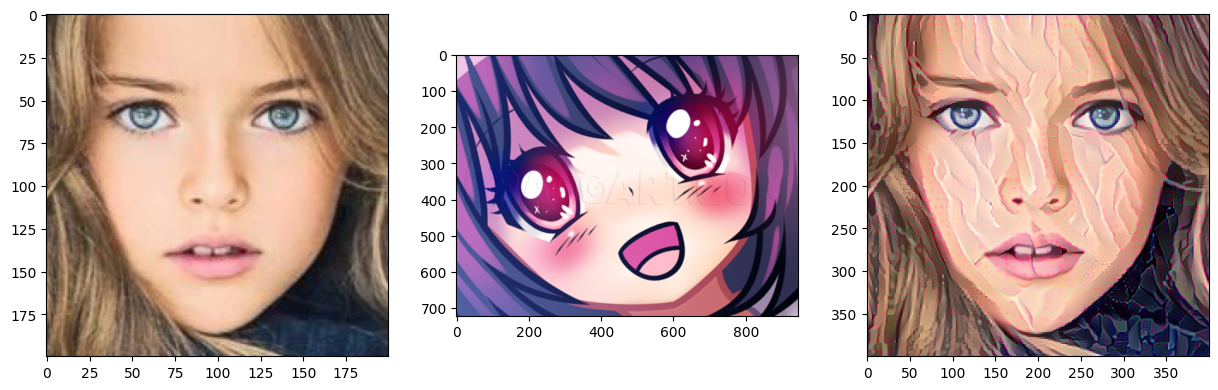

In [7]:
# --- Experiment 4: ----
final_img_path= Path("Results/Manga/Manga_E4.png")
style_weight = 2.5e-8
content_weight = 2.5e-8

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=2051.89
Iteration 200: loss=1271.81
Iteration 300: loss=976.39
Iteration 400: loss=815.06
Iteration 500: loss=711.26
Iteration 600: loss=638.10
Iteration 700: loss=583.44
Iteration 800: loss=540.83
Iteration 900: loss=506.53
Iteration 1000: loss=478.14
Iteration 1100: loss=454.18
Iteration 1200: loss=433.82
Iteration 1300: loss=416.22
Iteration 1400: loss=400.90
Iteration 1500: loss=387.50
Iteration 1600: loss=375.61
Iteration 1700: loss=365.06
Iteration 1800: loss=355.58
Iteration 1900: loss=346.98
Iteration 2000: loss=339.16
Iteration 2100: loss=332.02
Iteration 2200: loss=325.48
Iteration 2300: loss=319.47
Iteration 2400: loss=313.94
Iteration 2500: loss=308.86
Iteration 2600: loss=304.16
Iteration 2700: loss=299.83
Iteration 2800: loss=295.82
Iteration 2900: loss=292.09
Iteration 3000: loss=288.63
Iteration 3100: loss=285.40
Iteration 3200: loss=282.39
Iteration 3300: loss=279.56
Iteration 3400: loss=276.90
Iteration 3500: loss=274.41
Iteration 3600: loss=272.07

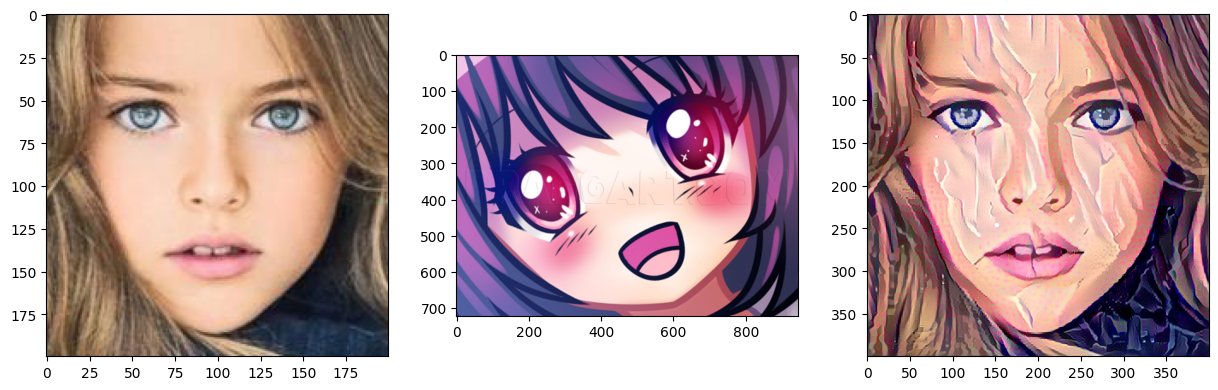

In [8]:
# --- Experiment 5: ----
final_img_path= Path("Results/Manga/Manga_E5.png")
style_weight = 2e-7
content_weight = 1e-10

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()